# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from datetime import date

today = date.today()

date = today.strftime("%m/%d/%y")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 80)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
    
# Print the city count to confirm sufficient count
len(cities)

562

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bf07decb51285129e7d8fc3985511c02&units=imperial&q='

In [5]:
# Set up lists to hold reponse info

existing_city=[]
city_errors=[]
lat = []
long = []
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record_counter=0


print("Beginning Data Retrieval")
print("-"*20)
    
for city in cities:
    response=requests.get(query_url + city).json()

    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        existing_city.append(city)
        record_counter=record_counter+1
        print(f"Processing Record {record_counter} | {city}")
        
    except KeyError:
        city_errors.append(city)
        print(f"**{city} not found. Skipping...**")
        


Beginning Data Retrieval
--------------------
**Toliary not found. Skipping...**
Processing Record 1 | Salamanca
Processing Record 2 | Jamestown
Processing Record 3 | Richards bay
Processing Record 4 | Hualmay
Processing Record 5 | Punta arenas
Processing Record 6 | Ambilobe
Processing Record 7 | Hamilton
Processing Record 8 | Ponta do sol
Processing Record 9 | Qaanaaq
Processing Record 10 | Dossor
Processing Record 11 | Port elizabeth
**Taolanaro not found. Skipping...**
Processing Record 12 | Cayenne
Processing Record 13 | Porto walter
Processing Record 14 | Rikitea
Processing Record 15 | Belem de sao francisco
Processing Record 16 | Port alfred
Processing Record 17 | Thompson
**Zachagansk not found. Skipping...**
**Belushya guba not found. Skipping...**
Processing Record 18 | Guerrero negro
Processing Record 19 | Butembo
**Attawapiskat not found. Skipping...**
Processing Record 20 | Crasna
Processing Record 21 | Cidreira
Processing Record 22 | Kagoro
Processing Record 23 | Upernavik

Processing Record 225 | Comodoro rivadavia
Processing Record 226 | San jose
**Saint quentin not found. Skipping...**
Processing Record 227 | Saint anthony
Processing Record 228 | Songea
Processing Record 229 | Garowe
Processing Record 230 | Sorland
Processing Record 231 | Lagos
Processing Record 232 | Quatre cocos
Processing Record 233 | Touros
Processing Record 234 | Klaksvik
Processing Record 235 | North bend
Processing Record 236 | Lysyanka
Processing Record 237 | Camargo
Processing Record 238 | College
Processing Record 239 | Kasempa
Processing Record 240 | Tabou
Processing Record 241 | Storforshei
Processing Record 242 | Faya
Processing Record 243 | Pisco
**Kazalinsk not found. Skipping...**
Processing Record 244 | Nadvoitsy
Processing Record 245 | San rafael
Processing Record 246 | Vestmannaeyjar
Processing Record 247 | Lollar
Processing Record 248 | Nanortalik
Processing Record 249 | Zorritos
Processing Record 250 | Narwar
Processing Record 251 | Kavaratti
Processing Record 252 

Processing Record 460 | Aradippou
Processing Record 461 | Emporia
Processing Record 462 | Durban
Processing Record 463 | Jiwani
Processing Record 464 | Porto torres
Processing Record 465 | San quintin
Processing Record 466 | Ati
**Saleaula not found. Skipping...**
Processing Record 467 | Yalta
Processing Record 468 | Canto do buriti
Processing Record 469 | Sheboygan
Processing Record 470 | Olot
Processing Record 471 | Zaria
Processing Record 472 | Rundu
Processing Record 473 | Benjamin aceval
Processing Record 474 | Haysville
Processing Record 475 | Brae
Processing Record 476 | Rondonopolis
Processing Record 477 | Sabalgarh
Processing Record 478 | Kilindoni
Processing Record 479 | Felipe carrillo puerto
Processing Record 480 | The valley
Processing Record 481 | Awbari
Processing Record 482 | Malinovoye ozero
Processing Record 483 | Tevaitoa
Processing Record 484 | Beloha
**Bolshegrivskoye not found. Skipping...**
**Buqayq not found. Skipping...**
Processing Record 485 | Cuamba
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": existing_city,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)

#saving data frame to csv
weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Salamanca,40.8333,-6.0000,56.98,40,0,4.85,ES,1628468694
1,Jamestown,42.0970,-79.2353,78.39,82,1,3.00,US,1628468794
2,Richards bay,-28.7830,32.0377,64.09,57,1,10.16,ZA,1628468866
3,Hualmay,-11.0964,-77.6139,62.56,83,40,14.09,PE,1628468866
4,Punta arenas,-53.1500,-70.9167,41.11,75,90,12.66,CL,1628468866


In [7]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,5.240000e+02
mean,20.427043,-25.405845,69.740763,71.404580,46.635496,7.652882,1.628469e+09
std,31.313819,67.049222,13.842753,21.380475,38.507762,5.205751,7.543564e+01
min,-54.800000,-179.166700,33.750000,7.000000,0.000000,0.000000,1.628468e+09
25%,-5.288400,-76.204175,59.200000,60.750000,5.750000,3.690000,1.628469e+09
50%,22.945450,-17.391500,71.085000,77.000000,43.500000,6.290000,1.628469e+09
75%,45.169600,30.603600,79.970000,88.000000,90.000000,10.672500,1.628469e+09
max,78.218600,168.864300,106.430000,100.000000,100.000000,27.470000,1.628469e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df[weather_df["Humidity"].astype(float)>100]


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.

#****no cities with humidity over 100 found. *****

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

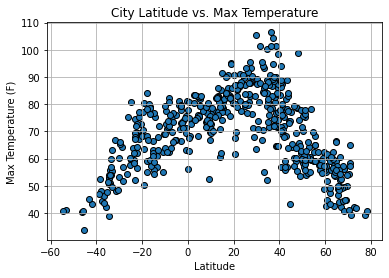

Analysis:
This plot is analyzing the current max temperatures at latitudes.
Temperatures appear to be higher as they get closer to latitude 20.
Temperatures decrease the further away they are from latitude 20 in either direction.


In [11]:
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Max Temp.png")

plt.show()

print("Analysis:")
print("This plot is analyzing the current max temperatures at latitudes.")
print("Temperatures appear to be higher as they get closer to latitude 20.")
print("Temperatures decrease the further away they are from latitude 20 in either direction.")

## Latitude vs. Humidity Plot

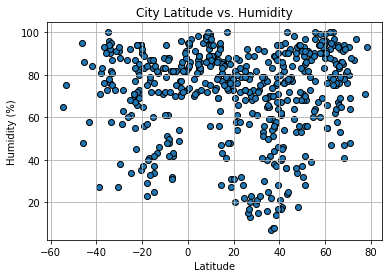

Analysis:
This plot is analyzing the current % of humidity at latitudes.
Humidity % exists across the board but appears to be more dense
at latitude 0 and above.


In [12]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Humidity.png")

plt.show()

print("Analysis:")
print("This plot is analyzing the current % of humidity at latitudes.")
print("Humidity % exists across the board but appears to be more dense")
print("at latitude 0 and above.")

## Latitude vs. Cloudiness Plot

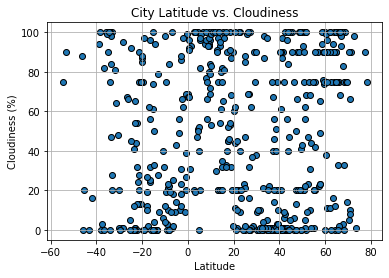

Analysis:
This plot is analyzing the current % of cloudiness at latitudes.
Cloudiness % appears to be intense in the northern hemisphere.


In [13]:
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Cloudiness.png")


plt.show()

print("Analysis:")
print("This plot is analyzing the current % of cloudiness at latitudes.")
print("Cloudiness % appears to be intense in the northern hemisphere.")

## Latitude vs. Wind Speed Plot

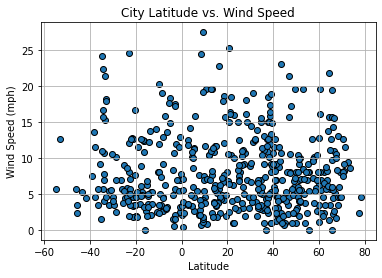

Analysis:
This plot is analyzing the current wind speed at latitudes.
Wind speed is mostly under 15mph but appears to increase more
the closer it is to latitudes 0 and 20.


In [14]:
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output/City Latitude vs Wind Speed.png")


plt.show()

print("Analysis:")
print("This plot is analyzing the current wind speed at latitudes.")
print("Wind speed is mostly under 15mph but appears to increase more")
print("the closer it is to latitudes 0 and 20.")

## Linear Regression

In [15]:
# Create reduced northern and southern hemisphere dataframes for linear regressions

northern_hem_df=weather_df[weather_df["Lat"]>=0]
southern_hem_df=weather_df[weather_df["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.626522882026584
The p-value is: 5.89919819358434e-42


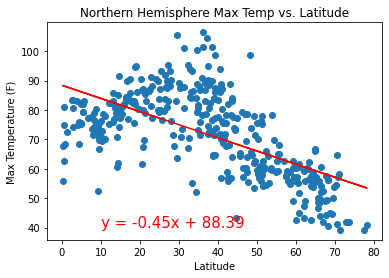

Analysis:
This plot is analyzing the current max temperature of cities
located in the northern hemisphere.
Many temps increase the closer they are to the equator.
The high r-value tells us it is representative of most of the data.


In [16]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")
print(f"The p-value is: {p_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Temp vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the northern hemisphere.")
print("Many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7521335828969232


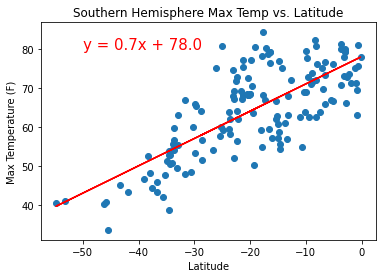

Analysis:
This plot is analyzing the current max temperature of cities
located in the southern hemisphere.
Like in the northern hemisphere, many temps increase the closer they are to the equator.
The high r-value tells us it is representative of most of the data.


In [17]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Temp vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the southern hemisphere.")
print("Like in the northern hemisphere, many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0017397475722050828


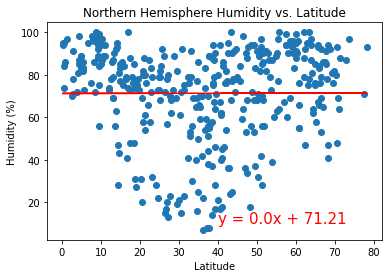

Analysis:
This plot is analyzing the current humidity of cities
located in the northern hemisphere.
Humidity seems mid to high for most cities in the northern hemisphere.
There is a slight positive correlation closer to the equator.
The low r-value tells us it is not representative of most of the data.


In [18]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Humidity vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the northern hemisphere.")
print("Humidity seems mid to high for most cities in the northern hemisphere.")
print("There is a slight positive correlation closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.10847120386799182


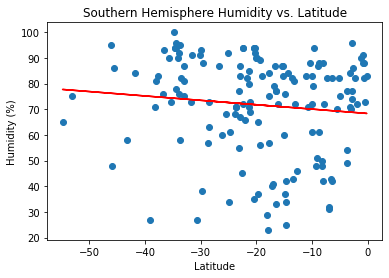

Analysis:
This plot is analyzing the current humidity of cities
located in the southern hemisphere.
Humidity seems mid to high for most cities in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data.


In [19]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Humidity vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the southern hemisphere.")
print("Humidity seems mid to high for most cities in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06375845387912314


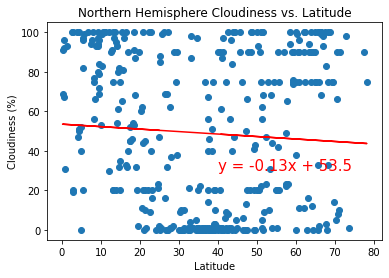

Analysis:
This plot is analyzing the current cloudiness of cities
located in the northern hemisphere.
Cloudiness is split between extremely cloudy or not cloudy at all.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data
but we can see on the graph that number is being swayed by both ends of the spectrum.


In [20]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Cloudiness vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the northern hemisphere.")
print("Cloudiness is split between extremely cloudy or not cloudy at all.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")
print("but we can see on the graph that number is being swayed by both ends of the spectrum.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.189139798918241


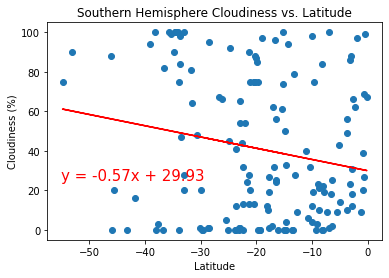

Analysis:
This plot is analyzing the current cloudiness of cities
located in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [21]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Cloudiness vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.018518768403364826


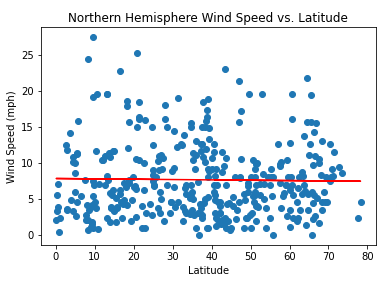

Analysis:
This plot is analyzing the current wind speed of cities
located in the northern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [22]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f'Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Northern Hemisphere Wind Speed vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the northern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04539335284664907


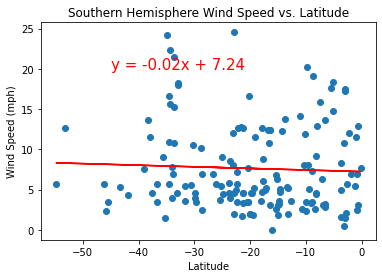

Analysis:
This plot is analyzing the current wind speed of cities
located in the southern hemisphere.
There is a slight negative correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [23]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.title(f'Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output/Southern Hemisphere Wind Speed vs Latitude.png")


plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the southern hemisphere.")
print("There is a slight negative correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")